In [53]:
from rfgap import RFGAP
from sklearn.model_selection import train_test_split
from dataset import dataprep


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read in the data and normalize

In [54]:
# TODO: Test with NumPy and Pandas, ALL METHODS and perhaps combos of each type. Problem with categorical data in Pandas?
# We should probably modify RFGAP to handle categorical data in the form of strings.

In [55]:
seed = 42
prox_method = 'rfgap'
force_symmetric = False
non_zero_diagonal = False
oob_score = True
verbose=True
test_size=0.2
n_jobs = -1

data = pd.read_csv('/Users/aumona/Projects/RF-GAP-Python/data/iris.csv')
x, y   = dataprep(data)

n_samples = x.shape[0]
n_features = x.shape[1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

print(f"Train samples: {x_train.shape[0]}, Test samples: {x_test.shape[0]}")
print(f"Number of features: {x_train.shape[1]}")

Train samples: 120, Test samples: 30
Number of features: 4


## Train the RF Model

In [56]:
rf = RFGAP(y = y_train, prox_method = prox_method, matrix_type = 'sparse', oob_score = True, non_zero_diagonal = non_zero_diagonal,
           random_state = seed, n_jobs = n_jobs, force_symmetric = force_symmetric, verbose=verbose)

In [57]:
rf.fit(x_train, y_train)

Pre-calculating K matrix (in-bag leaf counts)...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


## Generate the Proximity Matrix

In [58]:
# compute/get proximity matrix and visualize with seaborn heatmap
prox = rf.get_proximities()

Calculating 'rfgap' proximities with T-loop (parallelized with n_jobs=12)...
Calculating asymmetric proximities (T-loop list extend)...


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


# Visualize it

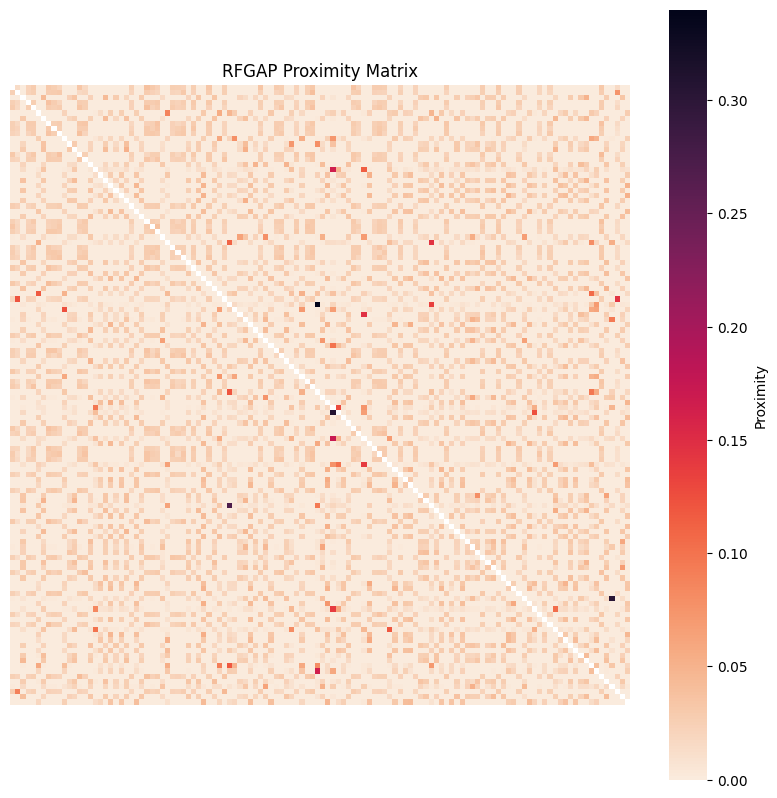

In [59]:

prox_mat = prox.toarray()

# mask diagonal to emphasize off-diagonal proximities
mask = np.eye(prox_mat.shape[0], dtype=bool)

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(prox_mat, ax=ax, cmap='rocket_r', vmin=0, vmax=prox_mat.max(), mask=mask,
            xticklabels=False, yticklabels=False, square=True, cbar_kws={'label': 'Proximity'})
ax.set_title(f'{prox_method.upper()} Proximity Matrix')
plt.show()

## Check extended proximity computation using a training subset

In [60]:
rf.prox_extend(x_test, [1,4,77,80]).toarray()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


Calculating 'rfgap' extended proximities with T-loop (parallelized with n_jobs=12)...
Slicing pre-calculated K matrix for subset...
Calculating asymmetric proximities (T-loop list extend)...


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


array([[0.        , 0.        , 0.        , 0.02801453],
       [0.10942946, 0.02054342, 0.        , 0.        ],
       [0.        , 0.        , 0.02750397, 0.        ],
       [0.        , 0.        , 0.        , 0.02934786],
       [0.        , 0.        , 0.0012334 , 0.01850895],
       [0.01876279, 0.02622419, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.02609786],
       [0.        , 0.        , 0.02965214, 0.        ],
       [0.        , 0.        , 0.        , 0.02285392],
       [0.        , 0.        , 0.        , 0.02564331],
       [0.        , 0.        , 0.03257966, 0.        ],
       [0.01709613, 0.02557903, 0.        , 0.        ],
       [0.06276279, 0.02152574, 0.        , 0.00220264],
       [0.01709613, 0.02622419, 0.        , 0.        ],
       [0.01709613, 0.02622419, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.02928823],
       [0.        , 0.        , 0.03650119, 0.        ],
       [0.        , 0.        ,

## Check Sum-to-One

In [61]:
np.sum(prox.toarray(), axis = 1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

## Measures of Trust

### RF-ICE (Trust Scores)

In [62]:
ice_scores = rf.get_instance_classification_expectation()
print(rf.trust_auc)

Calculating 'rfgap' proximities with T-loop (parallelized with n_jobs=12)...
Calculating asymmetric proximities (T-loop list extend)...
0.9761036935647303


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


#### Accuracy Rejection Curve

Text(0.5, 1.0, 'Scatter Plot of Training Data with 1 - Trust Scores')

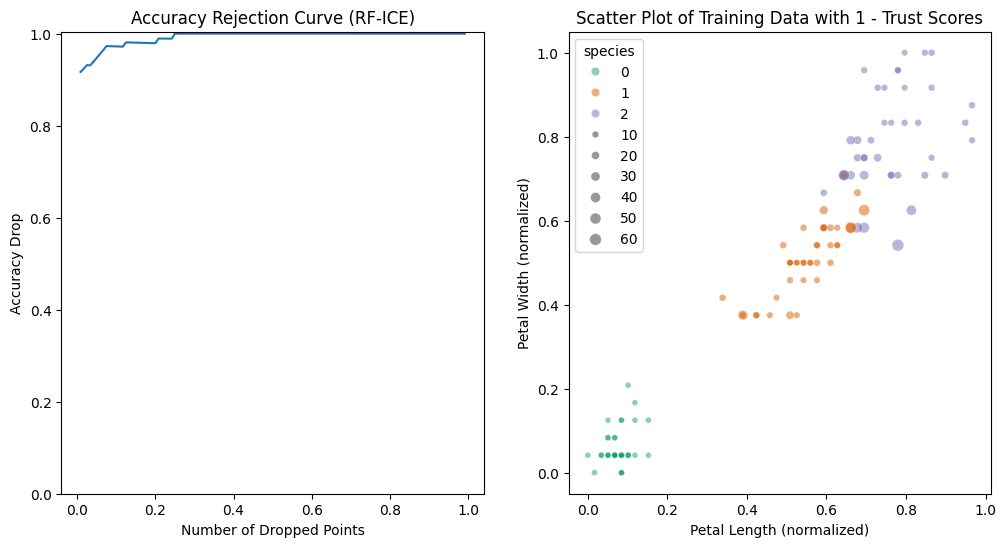

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

sns.lineplot(x=rf.trust_n_drop, y=rf.trust_accuracy_drop, ax=ax[0])
ax[0].set_xlabel('Number of Dropped Points')
ax[0].set_ylabel('Accuracy Drop')
ax[0].set_title('Accuracy Rejection Curve (RF-ICE)')
ax[0].set_ylim(0, None)

sns.scatterplot(x=x_train[:, 2], y=x_train[:, 3], hue=y_train, palette='Dark2',
                size=(np.max(rf.trust_scores) - rf.trust_scores) * 100 + 5, alpha=0.5, ax=ax[1])
ax[1].set_xlabel('Petal Length (normalized)')
ax[1].set_ylabel('Petal Width (normalized)')
ax[1].set_title('Scatter Plot of Training Data with 1 - Trust Scores')


### RF-ICE for Test Set

In [64]:
trust_scores_test = rf.get_test_trust(x_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished


Calculating 'rfgap' extended proximities with T-loop (parallelized with n_jobs=12)...
Slicing pre-calculated K matrix for subset...
Calculating asymmetric proximities (T-loop list extend)...


[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


Text(0.5, 1.0, 'Test Data with 1 - Trust Scores')

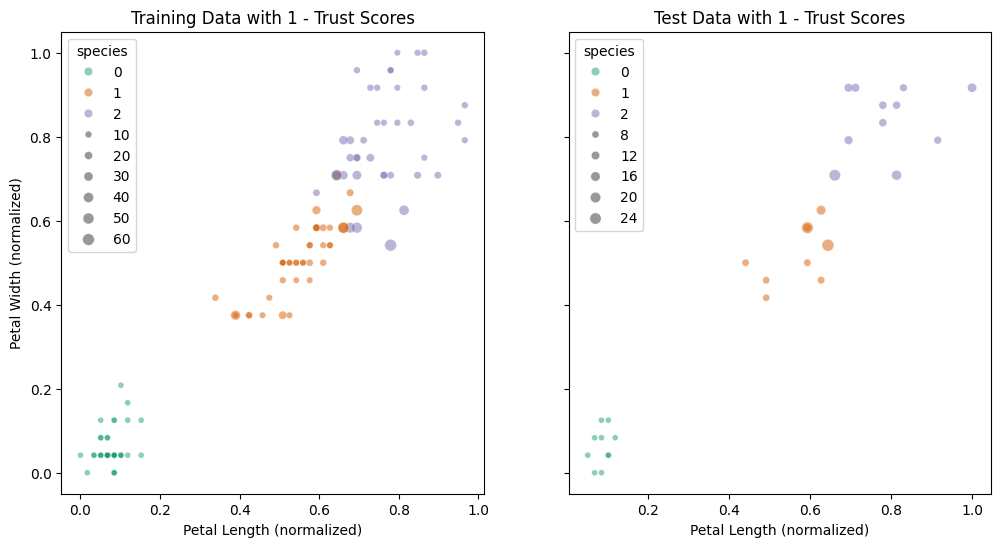

In [65]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharey = True)

sns.scatterplot(x=x_train[:, 2], y=x_train[:, 3], hue=y_train, palette='Dark2',
                size=(np.max(rf.trust_scores) - rf.trust_scores) * 100 + 5, alpha=0.5, ax=ax[0])
ax[0].set_xlabel('Petal Length (normalized)')
ax[0].set_ylabel('Petal Width (normalized)')
ax[0].set_title('Training Data with 1 - Trust Scores')

sns.scatterplot(x=x_test[:, 2], y=x_test[:, 3], hue=y_test, palette='Dark2',
                size=(np.max(rf.trust_scores_test) - rf.trust_scores_test) * 100 + 5, alpha=0.5, ax=ax[1])
ax[1].set_xlabel('Petal Length (normalized)')
ax[1].set_ylabel('Petal Width (normalized)')
ax[1].set_title('Test Data with 1 - Trust Scores')

In [66]:
rf.get_nonconformity(k = 5, x_test = x_test, proximity_type = 'rfgap')

[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=12)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:    0.0s


Calculating 'rfgap' proximities with T-loop (parallelized with n_jobs=12)...
Calculating asymmetric proximities (T-loop list extend)...
Calculating 'rfgap' extended proximities with T-loop (parallelized with n_jobs=12)...
Slicing pre-calculated K matrix for subset...
Calculating asymmetric proximities (T-loop list extend)...


[Parallel(n_jobs=12)]: Done 100 out of 100 | elapsed:    0.0s finished


In [67]:
rf.test_proximities.shape

(30, 120)

Text(0.5, 1.0, 'Scatter Plot of Training Data with Nonconformity Scores')

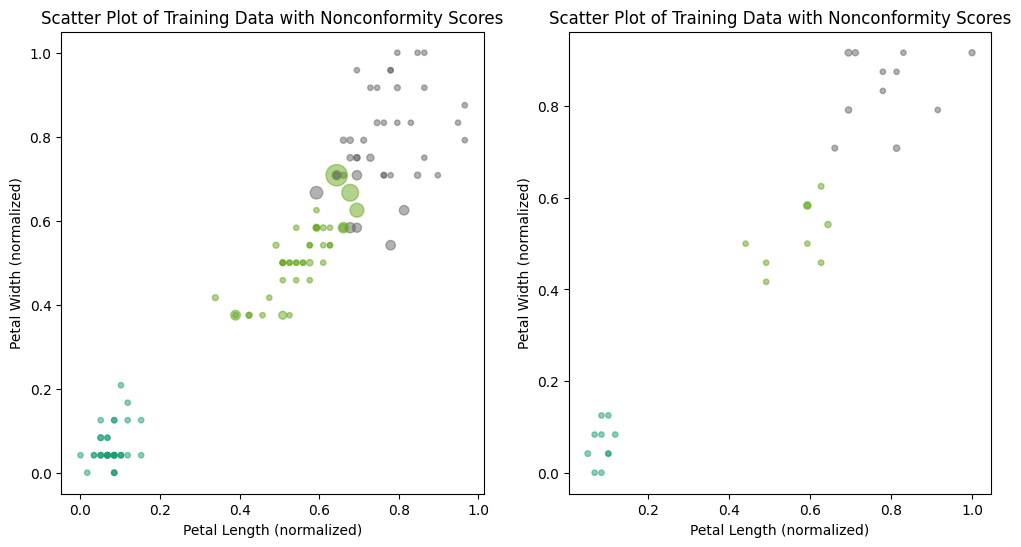

In [68]:
fig, ax = plt.subplots(1, 2, figsize=(12, 6))


ax[0].scatter(x_train[:, 2], x_train[:, 3], c=y_train, cmap='Dark2', 
            s=rf.nonconformity_scores * 20 + 15, alpha=0.5)
ax[0].set_xlabel('Petal Length (normalized)')
ax[0].set_ylabel('Petal Width (normalized)')
ax[0].set_title('Scatter Plot of Training Data with Nonconformity Scores')


ax[1].scatter(x_test[:, 2], x_test[:, 3], c = y_test, cmap='Dark2', 
            s=rf.nonconformity_scores_test * 20 + 15, alpha=0.5)
ax[1].set_xlabel('Petal Length (normalized)')
ax[1].set_ylabel('Petal Width (normalized)')
ax[1].set_title('Scatter Plot of Training Data with Nonconformity Scores')

Text(0.5, 1.0, 'Conformity Accuracy Rejection Curve')

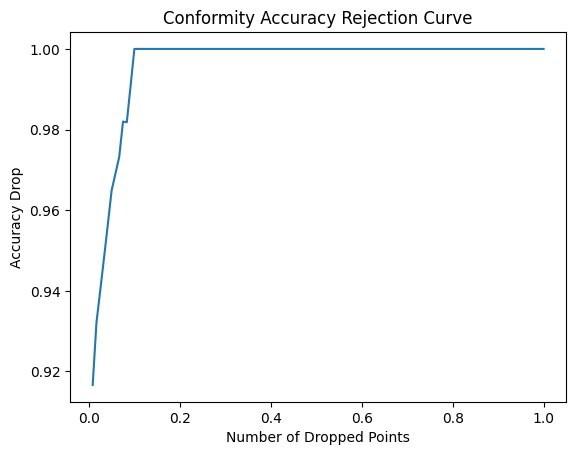

In [69]:
sns.lineplot(x=rf.conformity_n_drop, y=rf.conformity_accuracy_drop)
plt.xlabel('Number of Dropped Points')
plt.ylabel('Accuracy Drop')
plt.title('Conformity Accuracy Rejection Curve')

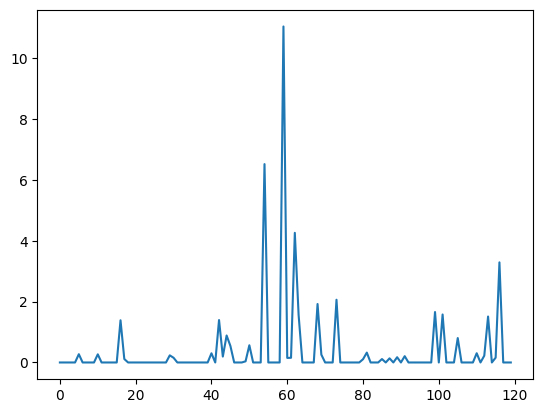

In [70]:
plt.plot(rf.nonconformity_scores)

In [71]:
                # Updates the following attributes:
                # - `self.nonconformity_scores`
                # - `self.conformity_scores`
                # - `self.conformity_quantiles`
                # - `self.conformity_auc`
                # - `self.conformity_accuracy_drop`
                # - `self.conformity_n_drop`
                
                # If `x_test` is provided, also updates:
                # - `self.nonconformity_scores_test`
                # - `self.conformity_scores_test`
                # - `self.conformity_quantiles_test`